# Power Generation
The following dataset (*TERNA_SUNSET_ENERGY_BALANCE*) make reference to the hourly production from renewable energy sources: water, geothermal, wind and solar power.
The energy required on the national grid to meet net internal consumption ('total load') is equal to the sum of the net electricity produced and the electricity imported from abroad, minus the energy absorbed by pumping and the energy exported.


In [1]:
import sys
import os
import pandas as pd

# Add the source directory to the system path
sys.path.append(os.path.abspath('../../src'))
from open_data import fetch_db_table_sqlserver16
import utils
import importlib
# Reload the module
importlib.reload(utils)

# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_ENERGY_BALANCE" 
power = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
power = power.sort_values(by='ORAINI')

power

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,ORAINI,FLOWDATE,FLOWHOUR,ENERGY_BALANCE_GWh,ENERGY_SOURCE,LOADTIME
0,201901010000,20190101,1,0.670,Geothermal,2024-10-17 11:16:54.393
1,201901010000,20190101,1,2.060,Hydro,2024-10-17 11:16:54.393
2,201901010000,20190101,1,1.440,Net Foreign Exchange,2024-10-17 11:16:54.393
3,201901010000,20190101,1,0.000,Photovoltaic,2024-10-17 11:16:54.393
4,201901010000,20190101,1,-0.030,Pumping-consumption,2024-10-17 11:16:54.393
...,...,...,...,...,...,...
415050,202412012300,20241201,24,8.350,Net Foreign Exchange,2024-12-02 06:25:06.443
415051,202412012300,20241201,24,0.000,Photovoltaic,2024-12-02 06:25:06.443
415052,202412012300,20241201,24,-0.070,Pumping-consumption,2024-12-02 06:25:06.443
415053,202412012300,20241201,24,1.554,Self-consumption,2024-12-02 06:25:06.443


In [2]:
# Filter the DataFrame for the relevant columns and rows
power = power[['ENERGY_BALANCE_GWh', 'ORAINI', 'ENERGY_SOURCE']]
# Convert ORAINI to datetime using the correct method
power['ORAINI'] = pd.to_datetime(power['ORAINI'], format='%Y%m%d%H%M')
power.set_index('ORAINI', inplace=True)

power

C:\Users\samueledelia\AppData\Local\Temp\3\ipykernel_2292\3394202153.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power['ORAINI'] = pd.to_datetime(power['ORAINI'], format='%Y%m%d%H%M')


,ENERGY_BALANCE_GWh,ENERGY_SOURCE
ORAINI,,
2019-01-01 00:00:00,0.670,Geothermal
2019-01-01 00:00:00,2.060,Hydro
2019-01-01 00:00:00,1.440,Net Foreign Exchange
2019-01-01 00:00:00,0.000,Photovoltaic
2019-01-01 00:00:00,-0.030,Pumping-consumption
...,...,...
2024-12-01 23:00:00,8.350,Net Foreign Exchange
2024-12-01 23:00:00,0.000,Photovoltaic
2024-12-01 23:00:00,-0.070,Pumping-consumption


In [3]:
# Get unique labels of the ENERGY_SOURCE
unique_energy_sources = power['ENERGY_SOURCE'].unique()

# Convert to list if needed
energy_sources_list = unique_energy_sources.tolist()

# Display the unique energy sources
print(energy_sources_list)

['Geothermal', 'Hydro', 'Net Foreign Exchange', 'Photovoltaic', 'Pumping-consumption', 'Self-consumption', 'Thermal', 'Wind']


In [4]:
thermo = utils.filter_and_rename_energy_source(power, 'Thermal', 'THERMO_GWH')
wind = utils.filter_and_rename_energy_source(power, 'Wind', 'WIND_GWH')
solar = utils.filter_and_rename_energy_source(power, 'Photovoltaic', 'SOLAR_GWH')
hydro = utils.filter_and_rename_energy_source(power, 'Hydro', 'HYDRO_GWH')
geothermal = utils.filter_and_rename_energy_source(power, 'Geothermal', 'GEO_GWH')
forex = utils.filter_and_rename_energy_source(power, 'Net Foreign Exchange', 'FOREX_GWH')

### Thermal production

In [5]:
thermo

,THERMO_GWH
ORAINI,
2019-01-01 00:00:00,13.35
2019-01-01 01:00:00,13.09
2019-01-01 02:00:00,12.42
2019-01-01 03:00:00,10.70
2019-01-01 04:00:00,10.39
...,...
2024-12-01 19:00:00,13.38
2024-12-01 20:00:00,12.87
2024-12-01 21:00:00,12.42


In [6]:
print("Macro-scale descriptive stats: THERMO")
print(thermo["THERMO_GWH"].describe(),"\n")

Macro-scale descriptive stats: THERMO
count    51882.000000
mean        17.015481
std          5.774141
min          3.990000
25%         12.510000
50%         16.530000
75%         21.260000
max         35.280000
Name: THERMO_GWH, dtype: float64 



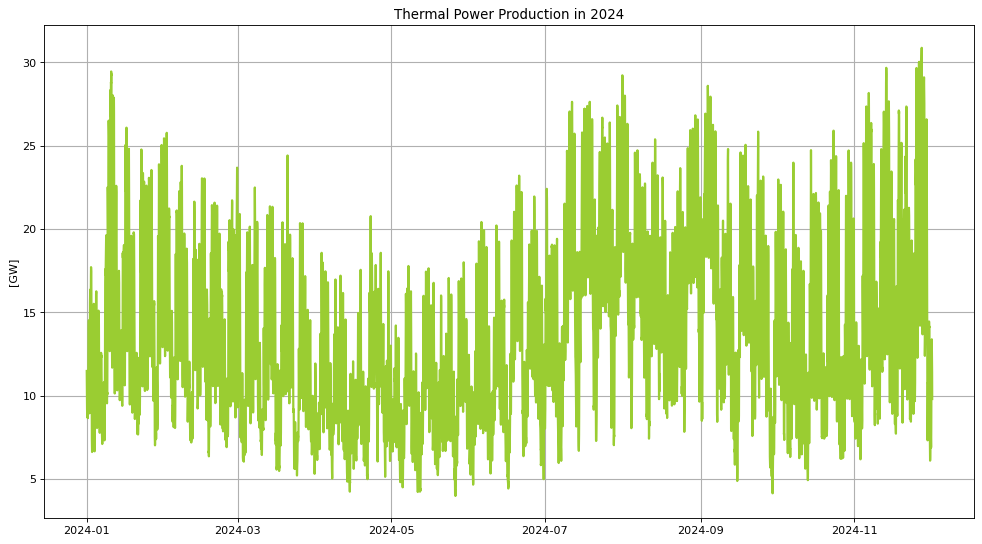

In [7]:
import matplotlib.pyplot as plt

DPI = 80
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(thermo["THERMO_GWH"].loc["2024"], linewidth=2, color = "yellowgreen") 

ax.set_title("Thermal Power Production in 2024"); ax.set_ylabel("[GW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

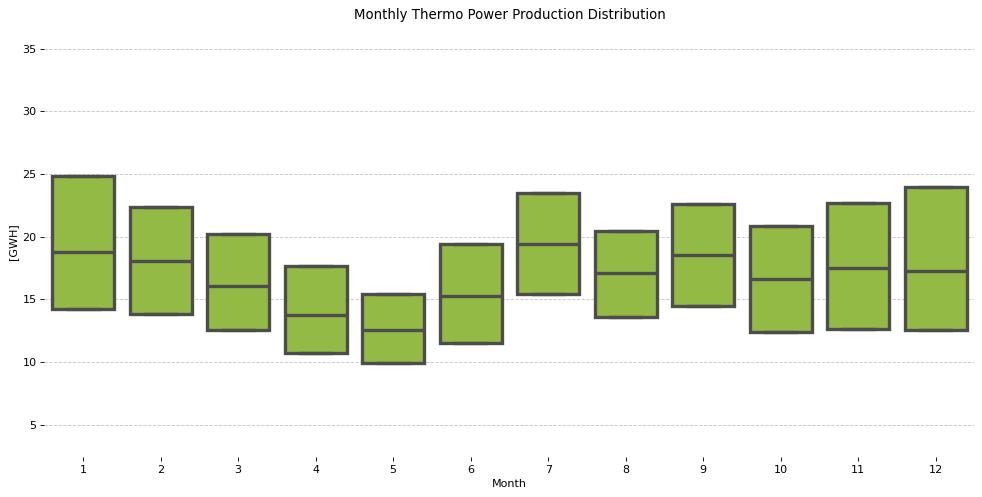

In [8]:
import seaborn as sns

thermo_copy = thermo.copy()
thermo_copy.loc[:, 'hour'] = thermo_copy.index.hour
thermo_copy.loc[:, 'month'] = thermo_copy.index.month

fig, ax = plt.subplots(figsize=(15, 7), dpi=DPI)
sns.boxplot(data=thermo_copy, x='month', y='THERMO_GWH', fliersize=0, whis=0, linewidth=3, ax=ax, color = "yellowgreen")
ax.set_xlabel("Month"); ax.set_ylabel("[GWH]")
ax.set_title("Monthly Thermo Power Production Distribution")
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

<h5> Trends in thermo </h5>
I use a rolling window of six months

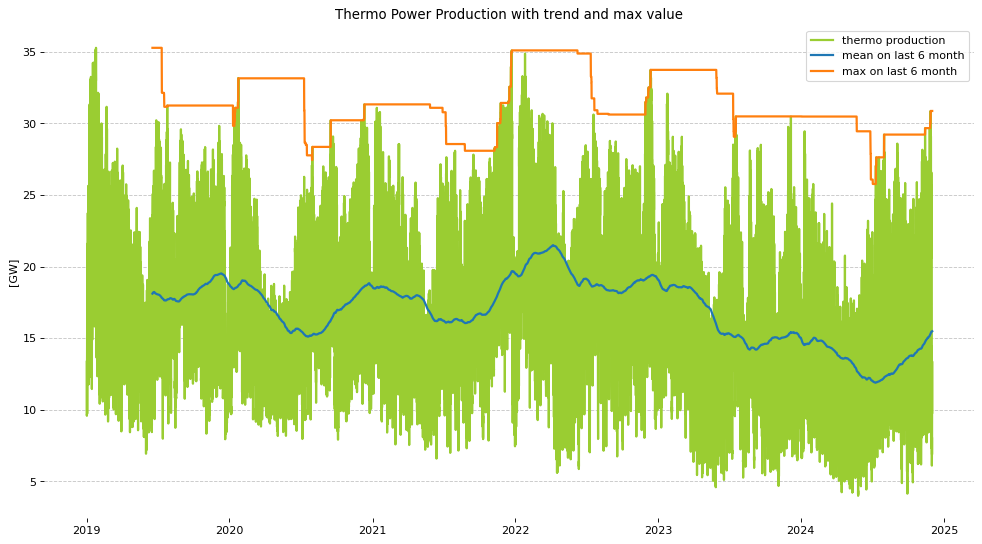

In [9]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(thermo["THERMO_GWH"], linewidth=2, label = 'thermo production', color = "yellowgreen") 
ax.plot(thermo["THERMO_GWH"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(thermo["THERMO_GWH"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Thermo Power Production with trend and max value"); ax.set_ylabel("[GW]")
ax.legend(loc='upper right')
plt.show()

### Wind production

In [10]:
print("Macro-scale descriptive stats: WIND")
print(wind["WIND_GWH"].describe(),"\n")

Macro-scale descriptive stats: WIND
count    51882.000000
mean         2.362505
std          1.735424
min          0.020000
25%          0.940000
50%          1.920000
75%          3.460000
max          8.790000
Name: WIND_GWH, dtype: float64 



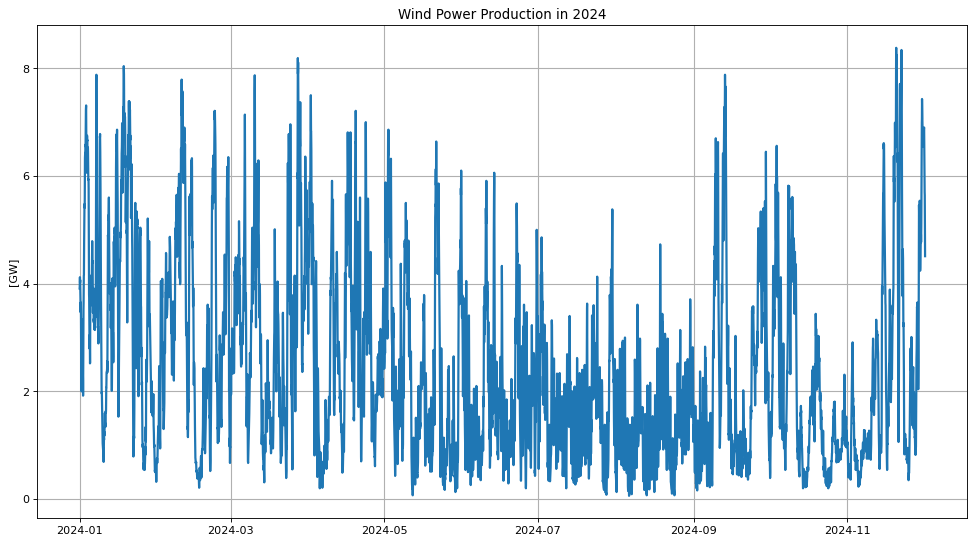

In [11]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(wind["WIND_GWH"].loc["2024"], linewidth=2) 

ax.set_title("Wind Power Production in 2024"); ax.set_ylabel("[GW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

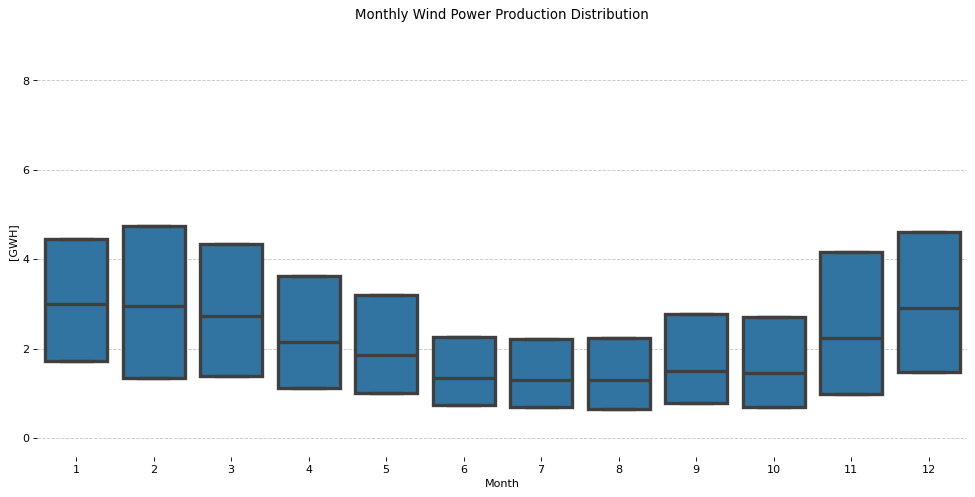

In [12]:
wind_copy = wind.copy()
wind_copy.loc[:, 'hour'] = wind_copy.index.hour
wind_copy.loc[:, 'month'] = wind_copy.index.month

fig, ax = plt.subplots(figsize=(15, 7), dpi=DPI)
sns.boxplot(data=wind_copy, x='month', y='WIND_GWH', fliersize=0, whis=0, linewidth=3, ax=ax)
ax.set_xlabel("Month"); ax.set_ylabel("[GWH]")
ax.set_title("Monthly Wind Power Production Distribution")
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

<h5>Trends in wind</h5>

I use a rolling window of six months

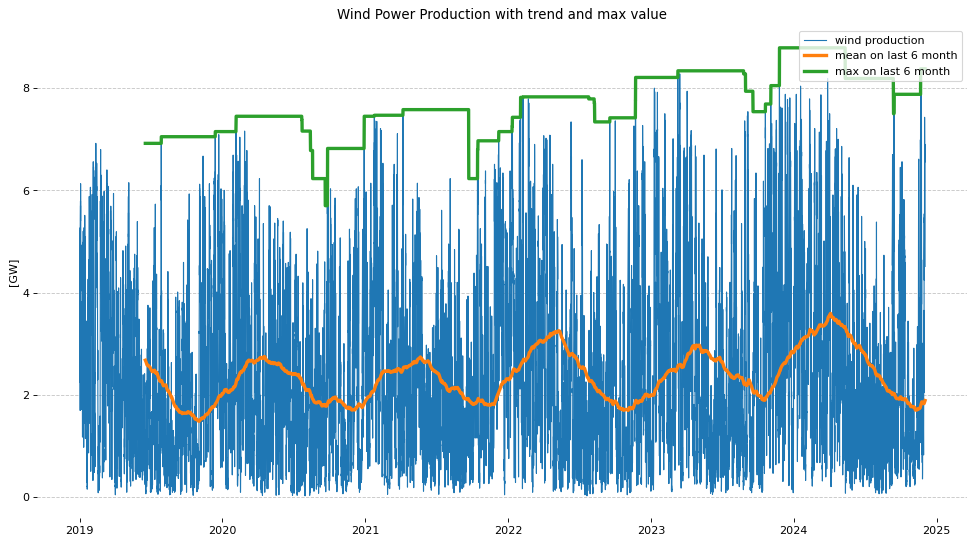

In [13]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(wind["WIND_GWH"], linewidth=1, label = 'wind production') 
ax.plot(wind["WIND_GWH"].rolling(24*7*4*6, center=False).mean(), linewidth=3, label = 'mean on last 6 month') 
ax.plot(wind["WIND_GWH"].rolling(24*7*4*6, center=False).max(), linewidth=3, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Wind Power Production with trend and max value"); ax.set_ylabel("[GW]")
ax.legend(loc='upper right')
plt.show()

### Hydro

In [14]:
hydro

,HYDRO_GWH
ORAINI,
2019-01-01 00:00:00,2.06
2019-01-01 01:00:00,1.75
2019-01-01 02:00:00,1.67
2019-01-01 03:00:00,1.48
2019-01-01 04:00:00,1.48
...,...
2024-12-01 19:00:00,5.88
2024-12-01 20:00:00,5.01
2024-12-01 21:00:00,3.56


In [15]:
print("Macro-scale descriptive stats: HYDRO")
print(hydro["HYDRO_GWH"].describe(),"\n")

Macro-scale descriptive stats: HYDRO
count    51882.000000
mean         5.019173
std          2.544835
min          0.610000
25%          2.930000
50%          4.690000
75%          6.800000
max         14.470000
Name: HYDRO_GWH, dtype: float64 



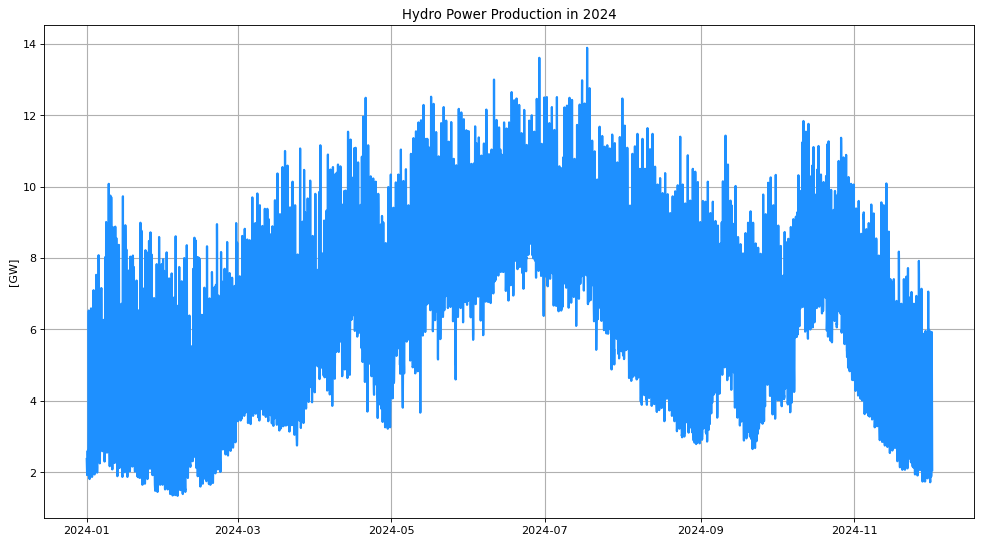

In [16]:
DPI = 80
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(hydro["HYDRO_GWH"].loc["2024"], linewidth=2, color = 'dodgerblue') 

ax.set_title("Hydro Power Production in 2024"); ax.set_ylabel("[GW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

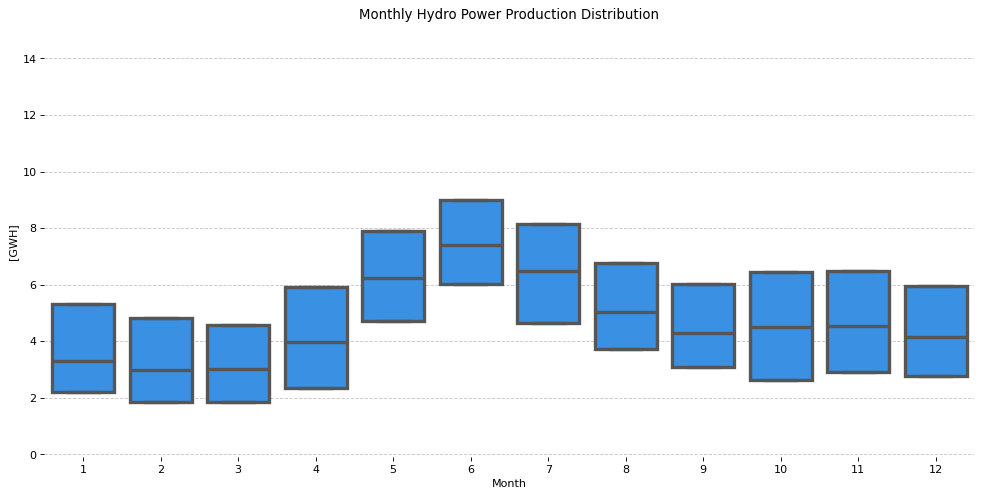

In [17]:
hydro_copy = hydro.copy()
hydro_copy.loc[:, 'hour'] = hydro_copy.index.hour
hydro_copy.loc[:, 'month'] = hydro_copy.index.month

fig, ax = plt.subplots(figsize=(15, 7), dpi=DPI)
sns.boxplot(data=hydro_copy, x='month', y='HYDRO_GWH', fliersize=0, whis=0, linewidth=3, ax=ax, color = 'dodgerblue')
ax.set_xlabel("Month"); ax.set_ylabel("[GWH]")
ax.set_title("Monthly Hydro Power Production Distribution")
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

<h5>Trends in wind</h5>

I use a rolling window of six months

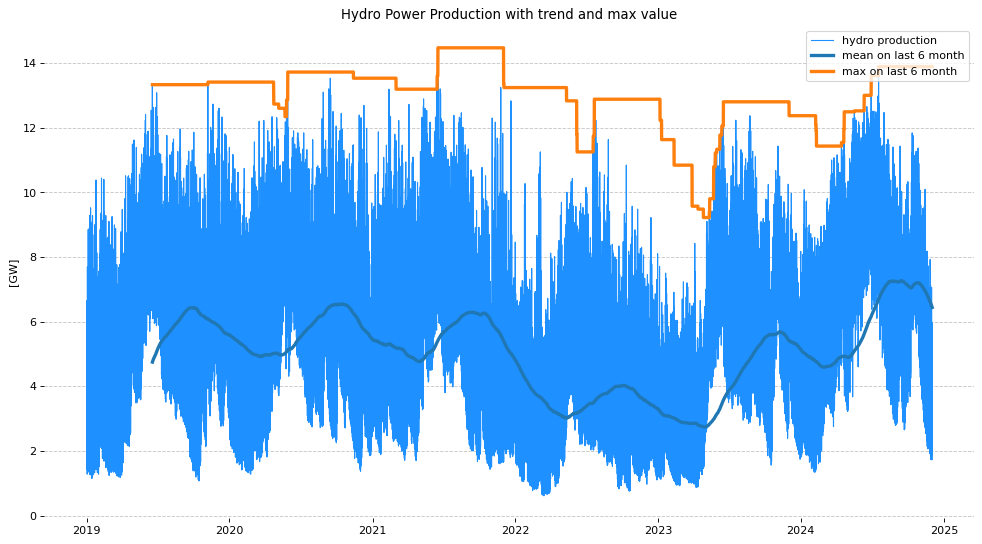

In [18]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(hydro["HYDRO_GWH"], linewidth=1, label = 'hydro production', color = 'dodgerblue') 
ax.plot(hydro["HYDRO_GWH"].rolling(24*7*4*6, center=False).mean(), linewidth=3, label = 'mean on last 6 month') 
ax.plot(hydro["HYDRO_GWH"].rolling(24*7*4*6, center=False).max(), linewidth=3, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Hydro Power Production with trend and max value"); ax.set_ylabel("[GW]")
ax.legend(loc='upper right')
plt.show()

### Photovoltaic production

In [19]:
solar 

,SOLAR_GWH
ORAINI,
2019-01-01 00:00:00,0.0
2019-01-01 01:00:00,0.0
2019-01-01 02:00:00,0.0
2019-01-01 03:00:00,0.0
2019-01-01 04:00:00,0.0
...,...
2024-12-01 19:00:00,0.0
2024-12-01 20:00:00,0.0
2024-12-01 21:00:00,0.0


In [20]:
print("Macro-scale descriptive stats: SOLAR")
print(solar["SOLAR_GWH"].describe(),"\n")

Macro-scale descriptive stats: SOLAR
count    51882.000000
mean         2.498757
std          3.493687
min         -0.010000
25%          0.000000
50%          0.080000
75%          4.760000
max         15.190000
Name: SOLAR_GWH, dtype: float64 



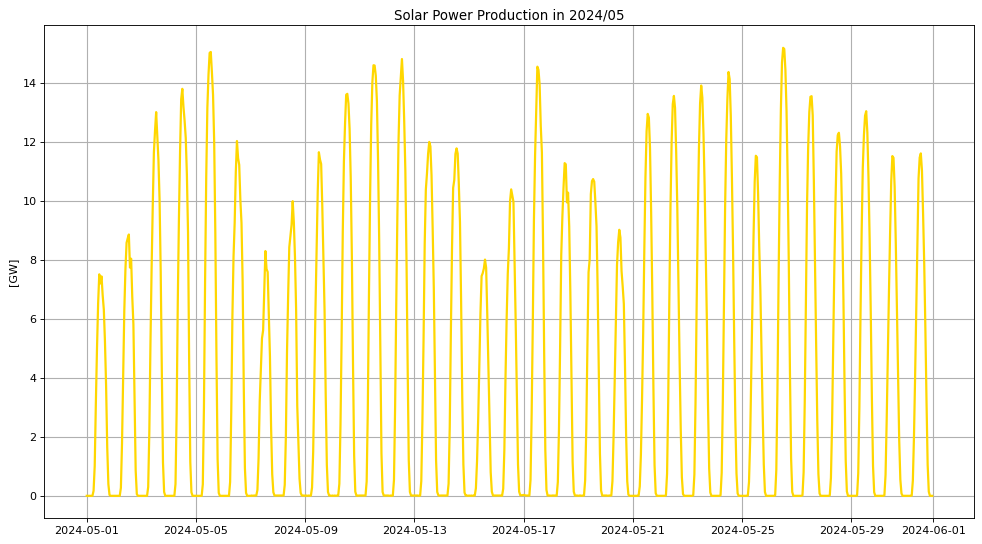

In [21]:
DPI = 80
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(solar["SOLAR_GWH"].loc["2024-05"], linewidth=2, color = 'gold') 

ax.set_title("Solar Power Production in 2024/05"); ax.set_ylabel("[GW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

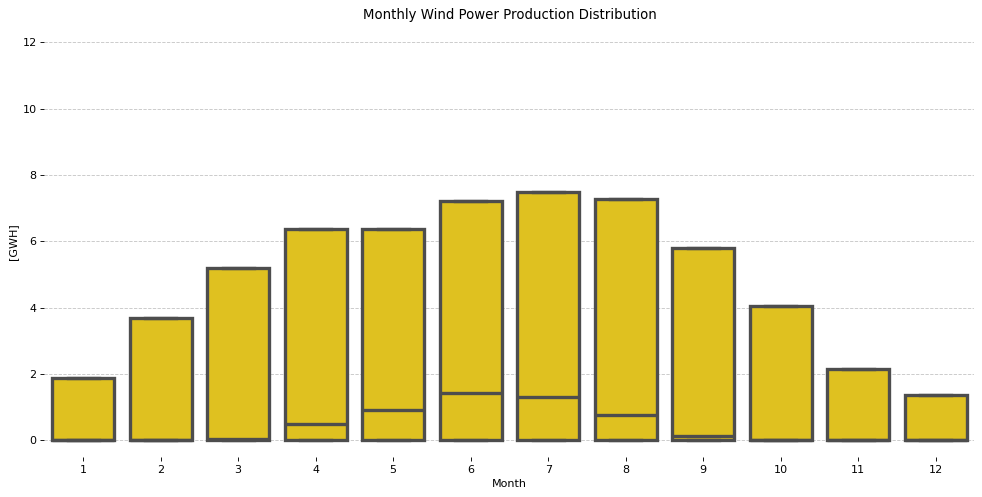

In [22]:
solar_copy = solar.copy()
solar_copy.loc[:, 'hour'] = solar_copy.index.hour
solar_copy.loc[:, 'month'] = solar_copy.index.month

fig, ax = plt.subplots(figsize=(15, 7), dpi=DPI)
sns.boxplot(data=solar_copy, x='month', y='SOLAR_GWH', fliersize=0, whis=0, linewidth=3, ax=ax, color = 'gold')
ax.set_xlabel("Month"); ax.set_ylabel("[GWH]")
ax.set_title("Monthly Wind Power Production Distribution")
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_ylim(-0.5, 12.5)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

<h5> Trends in solar </h5>

I use a rolling window of six months

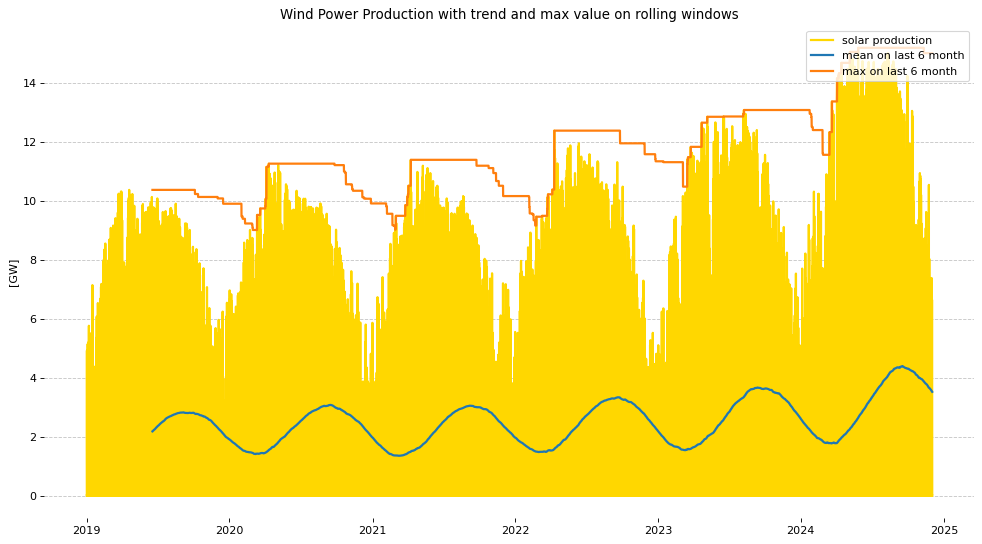

In [23]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(solar["SOLAR_GWH"], linewidth=2, label = 'solar production', color = 'gold') 
ax.plot(solar["SOLAR_GWH"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(solar["SOLAR_GWH"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Wind Power Production with trend and max value on rolling windows"); ax.set_ylabel("[GW]")
ax.legend(loc='upper right')
plt.show()

### Geothermal production

In [24]:
print("Macro-scale descriptive stats: GEO")
print(geothermal["GEO_GWH"].describe(),"\n")

Macro-scale descriptive stats: GEO
count    51882.000000
mean         0.626157
std          0.026090
min          0.470000
25%          0.610000
50%          0.630000
75%          0.650000
max          0.680000
Name: GEO_GWH, dtype: float64 



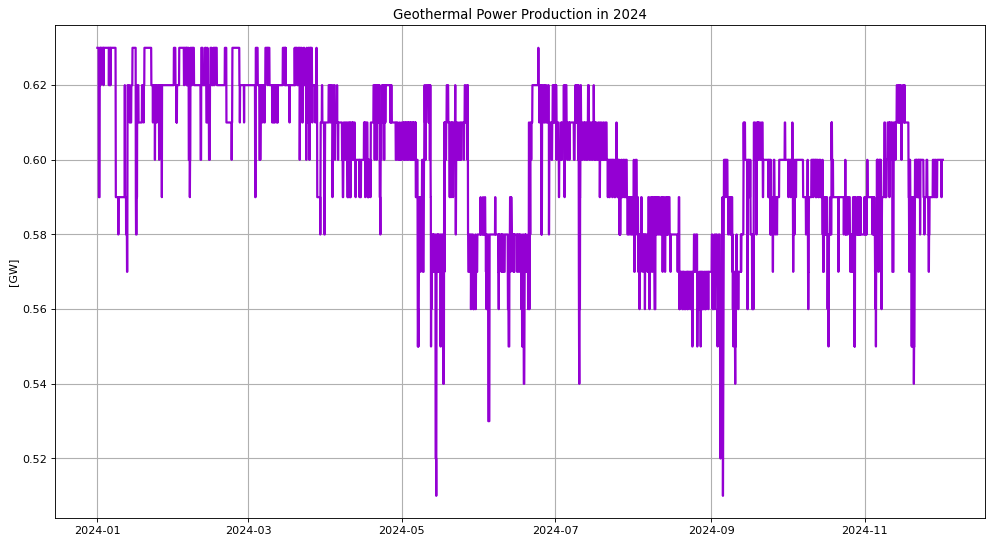

In [25]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(geothermal["GEO_GWH"].loc["2024"], linewidth=2, color = 'darkviolet') 

ax.set_title("Geothermal Power Production in 2024"); ax.set_ylabel("[GW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

### Net Foreign exchange


In [26]:
print("Macro-scale descriptive stats: FOREX")
print(forex["FOREX_GWH"].describe(),"\n")

Macro-scale descriptive stats: FOREX
count    51882.000000
mean         4.896534
std          2.177713
min         -4.940000
25%          3.720000
50%          5.190000
75%          6.330000
max         11.260000
Name: FOREX_GWH, dtype: float64 



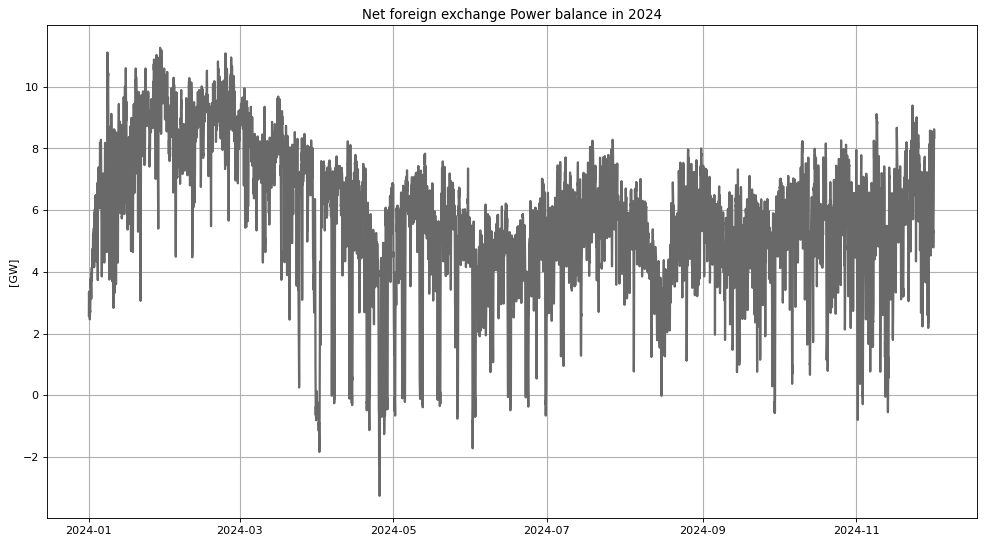

In [27]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(forex["FOREX_GWH"].loc["2024"], linewidth=2, color = 'dimgray') 

ax.set_title("Net foreign exchange Power balance in 2024"); ax.set_ylabel("[GW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

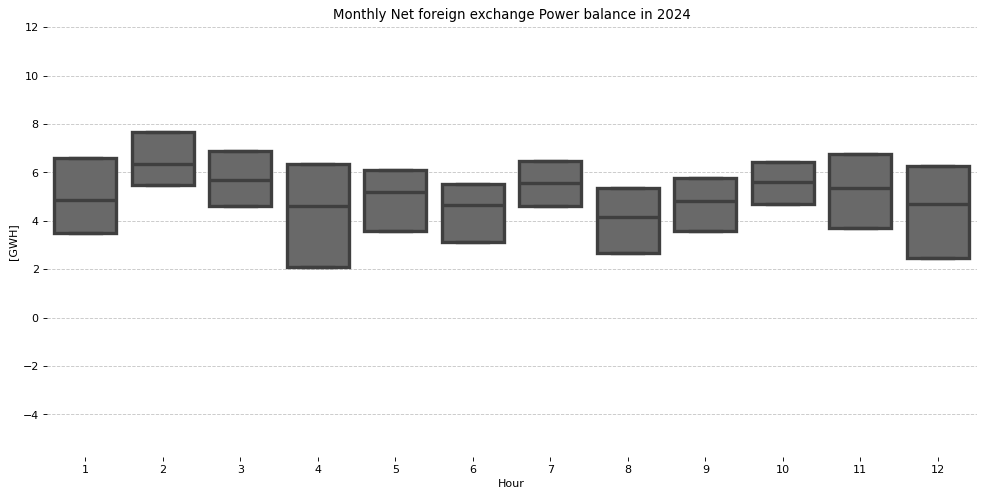

In [28]:
forex_copy = forex.copy()
forex_copy.loc[:, 'hour'] = forex_copy.index.hour
forex_copy.loc[:, 'month'] = forex_copy.index.month

fig, ax = plt.subplots(figsize=(15, 7), dpi=DPI)
sns.boxplot(data=forex_copy, x='month', y='FOREX_GWH', fliersize=0, whis=0, linewidth=3, ax=ax, color = 'dimgray')
ax.set_xlabel("Hour"); ax.set_ylabel("[GWH]")
ax.set_title("Monthly Net foreign exchange Power balance in 2024")
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

<h5> Trends in Foreign exchange </h5>
I use a rolling window of six months

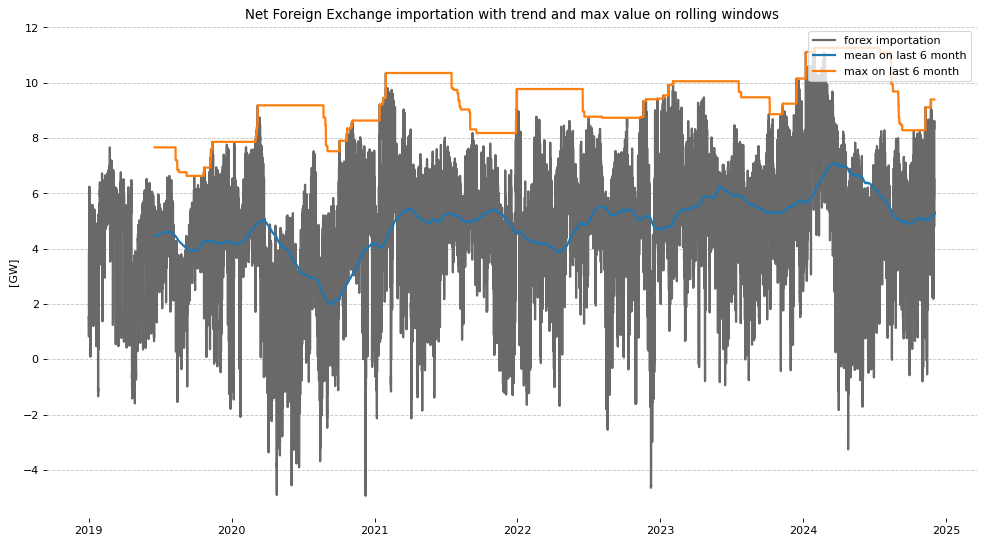

In [29]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(forex["FOREX_GWH"], linewidth=2, label = 'forex importation', color = 'dimgray') 
ax.plot(forex["FOREX_GWH"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(forex["FOREX_GWH"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Net Foreign Exchange importation with trend and max value on rolling windows"); ax.set_ylabel("[GW]")
ax.legend(loc='upper right')
plt.show()

# Entsoe Actual Generation per Production Type

In [30]:
import sys
import os
import pandas as pd

# Add the source directory to the system path
sys.path.append(os.path.abspath('../../src'))
from open_data import fetch_db_table_sqlserver16
import utils
import importlib

# Reload the module
importlib.reload(utils)

# SQL query to fetch data
sql_query = "SELECT * FROM ENTSOE_DATA" 
entsoe_data = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
entsoe_data = entsoe_data.sort_values(by='ORAINI')

entsoe_data

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,UTC,ORAINI,FLOWDATE,FLOWHOUR,CODZONA,MACROZONA,DOMAIN,SCOPE,ENERGY_TYPE,VALUE,UNIT,BUSINESS_TYPE,LOADTIME
0,2018-12-31T23:00,201901010000,20190101,1,CNOR,SUD,GENERATION,ACTUAL,Biomass,10.0,MW,PRODUCTION,2019-02-20 13:47:34.400
93,2018-12-31T23:00,201901010000,20190101,1,SICI,SUD,GENERATION,ACTUAL,Fossil Coal-derived gas,180.0,MW,PRODUCTION,2019-02-20 13:47:34.400
92,2018-12-31T23:00,201901010000,20190101,1,SICI,SUD,GENERATION,ACTUAL,Biomass,16.0,MW,PRODUCTION,2019-02-20 13:47:34.400
91,2018-12-31T23:00,201901010000,20190101,1,SARD,SUD,LOAD,DAY AHEAD,NA,938.0,MW,CONSUMPTION,2019-02-20 13:47:30.477
90,2018-12-31T23:00,201901010000,20190101,1,SARD,SUD,LOAD,ACTUAL,NA,914.0,MW,CONSUMPTION,2019-02-20 13:47:30.477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5439881,2024-12-03T22:00,202412032300,20241203,24,CSUD,SUD,LOAD,DAY AHEAD,NA,5013.0,MW,CONSUMPTION,2024-12-02 06:03:08.917
5439882,2024-12-03T22:00,202412032300,20241203,24,ITALY,ITALY,LOAD,DAY AHEAD,NA,30227.0,MW,CONSUMPTION,2024-12-02 06:03:08.917
5439883,2024-12-03T22:00,202412032300,20241203,24,NORD,NORD,LOAD,DAY AHEAD,NA,17233.0,MW,CONSUMPTION,2024-12-02 06:03:08.917
5439884,2024-12-03T22:00,202412032300,20241203,24,SARD,SUD,LOAD,DAY AHEAD,NA,852.0,MW,CONSUMPTION,2024-12-02 06:03:08.917


In [31]:
entsoe_data = entsoe_data[entsoe_data['DOMAIN'] == 'GENERATION']
entsoe_data = entsoe_data.drop(columns=['DOMAIN'])
# Convert ORAINI to datetime using the correct method
entsoe_data['ORAINI'] = pd.to_datetime(entsoe_data['ORAINI'], format='%Y%m%d%H%M')
entsoe_data.set_index('ORAINI', inplace=True)

entsoe_data

,UTC,FLOWDATE,FLOWHOUR,CODZONA,MACROZONA,SCOPE,ENERGY_TYPE,VALUE,UNIT,BUSINESS_TYPE,LOADTIME
ORAINI,,,,,,,,,,,
2019-01-01 00:00:00,2018-12-31T23:00,20190101,1,CNOR,SUD,ACTUAL,Biomass,10.0,MW,PRODUCTION,2019-02-20 13:47:34.400
2019-01-01 00:00:00,2018-12-31T23:00,20190101,1,SICI,SUD,ACTUAL,Fossil Coal-derived gas,180.0,MW,PRODUCTION,2019-02-20 13:47:34.400
2019-01-01 00:00:00,2018-12-31T23:00,20190101,1,SICI,SUD,ACTUAL,Biomass,16.0,MW,PRODUCTION,2019-02-20 13:47:34.400
2019-01-01 00:00:00,2018-12-31T23:00,20190101,1,SARD,SUD,INTRADAY,Wind Onshore,48.0,MW,WIND GENERATION,2019-02-20 13:47:34.400
2019-01-01 00:00:00,2018-12-31T23:00,20190101,1,SARD,SUD,INTRADAY,Solar,0.0,MW,SOLAR GENERATION,2019-02-20 13:47:34.400
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-02 23:00:00,2024-12-02T22:00,20241202,24,ITALY,ITALY,DAY AHEAD,Wind Onshore,611.0,MW,WIND GENERATION,2024-12-01 18:18:17.480
2024-12-02 23:00:00,2024-12-02T22:00,20241202,24,ITALY,ITALY,INTRADAY,Solar,0.0,MW,SOLAR GENERATION,2024-12-02 08:05:27.740
2024-12-02 23:00:00,2024-12-02T22:00,20241202,24,ITALY,ITALY,INTRADAY,Wind Onshore,583.0,MW,WIND GENERATION,2024-12-02 08:05:27.740


In [32]:
actual_generation = entsoe_data[entsoe_data['SCOPE'] == 'ACTUAL']
actual_generation = actual_generation[['CODZONA', 'VALUE', 'ENERGY_TYPE']]
actual_generation

,CODZONA,VALUE,ENERGY_TYPE
ORAINI,,,
2019-01-01 00:00:00,CNOR,10.0,Biomass
2019-01-01 00:00:00,SICI,180.0,Fossil Coal-derived gas
2019-01-01 00:00:00,SICI,16.0,Biomass
2019-01-01 00:00:00,SARD,58.0,Wind Onshore
2019-01-01 00:00:00,SARD,0.0,Solar
...,...,...,...
2024-12-02 07:00:00,ITALY,526.0,Hydro Water Reservoir
2024-12-02 07:00:00,ITALY,2280.0,Other
2024-12-02 07:00:00,ITALY,216.0,Solar


In [33]:
subset_zonas = ['NORD']
actual_generation_nord = actual_generation[actual_generation['CODZONA'].isin(subset_zonas)]
actual_generation_nord = actual_generation_nord.drop(columns=['CODZONA'])
actual_generation_nord

,VALUE,ENERGY_TYPE
ORAINI,,
2019-01-01 00:00:00,6.0,Wind Onshore
2019-01-01 00:00:00,32.0,Waste
2019-01-01 00:00:00,0.0,Solar
2019-01-01 00:00:00,2177.0,Other
2019-01-01 00:00:00,179.0,Hydro Water Reservoir
...,...,...
2024-12-02 07:00:00,0.0,Geothermal
2024-12-02 07:00:00,473.0,Hydro Pumped Storage
2024-12-02 07:00:00,3186.0,Hydro Run-of-river and poundage


In [34]:
subset_zonas = ['CNORD', 'CSUD', 'SUD', 'SICI', 'SARD', 'CALA']
actual_generation_sud = actual_generation[actual_generation['CODZONA'].isin(subset_zonas)]
actual_generation_sud = actual_generation_sud.drop(columns=['CODZONA'])
actual_generation_sud

# Group by datetime and sum TOTAL_LOAD_MW and FORECAST_TOTAL_LOAD_MW
actual_generation_sud = actual_generation_sud.groupby(actual_generation_sud.index).agg(
    VALUE=('VALUE', 'sum')
).reset_index()

actual_generation_sud

,ORAINI,VALUE
0,2019-01-01 00:00:00,11077.0
1,2019-01-01 01:00:00,11137.0
2,2019-01-01 02:00:00,11098.0
3,2019-01-01 03:00:00,10542.0
4,2019-01-01 04:00:00,10289.0
...,...,...
40743,2024-12-02 03:00:00,5249.0
40744,2024-12-02 04:00:00,5249.0
40745,2024-12-02 05:00:00,6670.0
40746,2024-12-02 06:00:00,8189.0


In [35]:
unique_energy_sources = actual_generation['ENERGY_TYPE'].unique()

energy_sources_list = unique_energy_sources.tolist()

print(energy_sources_list)

['Biomass', 'Fossil Coal-derived gas', 'Wind Onshore', 'Solar', 'Other', 'Fossil Gas', 'Hydro Water Reservoir', 'Hydro Pumped Storage', 'Fossil Oil', 'Fossil Hard coal', 'Hydro Run-of-river and poundage', 'Waste', 'Geothermal', 'Wind Offshore']


In [36]:
biomass_nord = utils.filter_and_rename_energy_type(actual_generation_nord, 'Biomass', 'BIOMASS_MW')
fossil_gas_nord = utils.filter_and_rename_energy_type(actual_generation_nord, 'Fossil Gas', 'FOSSIL_GAS_MW')
fossil_coal_nord = utils.filter_and_rename_energy_type(actual_generation_nord, 'Fossil Coal-derived gas', 'FOSSIL_COAL_MW')
wind_onshore_nord = utils.filter_and_rename_energy_type(actual_generation_nord, 'Wind Onshore', 'WIND_ONSHORE_MW')
solar_nord = utils.filter_and_rename_energy_type(actual_generation_nord, 'Solar', 'SOLAR_MW')
other_nord = utils.filter_and_rename_energy_type(actual_generation_nord, 'Other', 'OTHER_MW')
fossil_oil_nord = utils.filter_and_rename_energy_type(actual_generation_nord, 'Fossil Oil', 'FOSSIL_OIL_MW')
reservoir_nord = utils.filter_and_rename_energy_type(actual_generation_nord, 'Hydro Water Reservoir', 'WATER_RESERVOIR_MW')
hydro_pumped_nord = utils.filter_and_rename_energy_type(actual_generation_nord, 'Hydro Pumped Storage', 'HYDRO_PUMPED_MW')
geothermal_nord = utils.filter_and_rename_energy_type(actual_generation_nord, 'Geothermal', 'GEO_MW')
fossil_hard_coal_nord = utils.filter_and_rename_energy_type(actual_generation_nord, 'Fossil Hard coal', 'FOSSIL_HARD_COAL_MW')
wind_offshore_nord = utils.filter_and_rename_energy_type(actual_generation_nord, 'Wind Offshore', 'WIND_ONSHORE_MW')

<h1> Wind onshore nord </h1>

In [37]:
wind_onshore_nord

,WIND_ONSHORE_MW
ORAINI,
2019-01-01 00:00:00,6.0
2019-01-01 01:00:00,10.0
2019-01-01 02:00:00,14.0
2019-01-01 03:00:00,14.0
2019-01-01 04:00:00,16.0
...,...
2024-12-02 03:00:00,71.0
2024-12-02 04:00:00,70.0
2024-12-02 05:00:00,57.0


In [38]:
print("Macro-scale descriptive stats: WIND ONSHORE")
print(wind_onshore_nord["WIND_ONSHORE_MW"].describe(),"\n")

Macro-scale descriptive stats: WIND ONSHORE
count    40750.000000
mean        20.647951
std         26.690446
min          0.000000
25%          4.000000
50%         11.000000
75%         26.000000
max        167.000000
Name: WIND_ONSHORE_MW, dtype: float64 



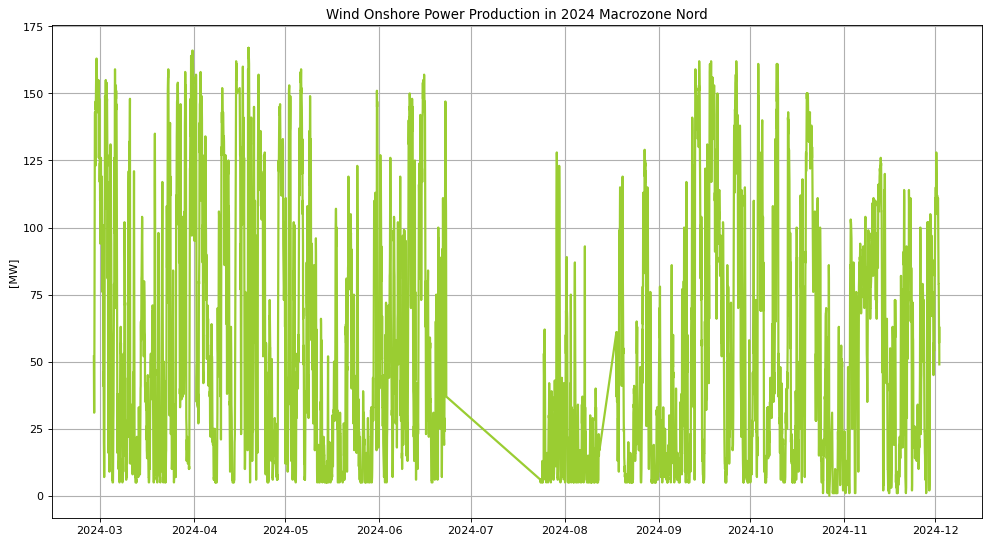

In [39]:
import matplotlib.pyplot as plt

DPI = 80
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(wind_onshore_nord["WIND_ONSHORE_MW"].loc["2024"], linewidth=2, color = "yellowgreen") 

ax.set_title("Wind Onshore Power Production in 2024 Macrozone Nord"); ax.set_ylabel("[MW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

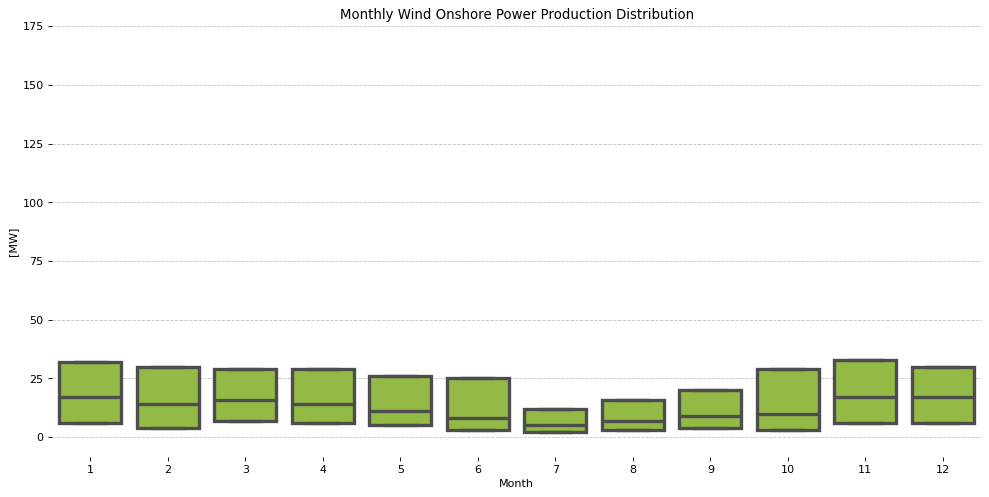

In [40]:
import seaborn as sns

wind_onshore_nord_copy = wind_onshore_nord.copy()
wind_onshore_nord_copy.loc[:, 'hour'] = wind_onshore_nord_copy.index.hour
wind_onshore_nord_copy.loc[:, 'month'] = wind_onshore_nord_copy.index.month

fig, ax = plt.subplots(figsize=(15, 7), dpi=DPI)
sns.boxplot(data=wind_onshore_nord_copy, x='month', y='WIND_ONSHORE_MW', fliersize=0, whis=0, linewidth=3, ax=ax, color = "yellowgreen")
ax.set_xlabel("Month"); ax.set_ylabel("[MW]")
ax.set_title("Monthly Wind Onshore Power Production Distribution")
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

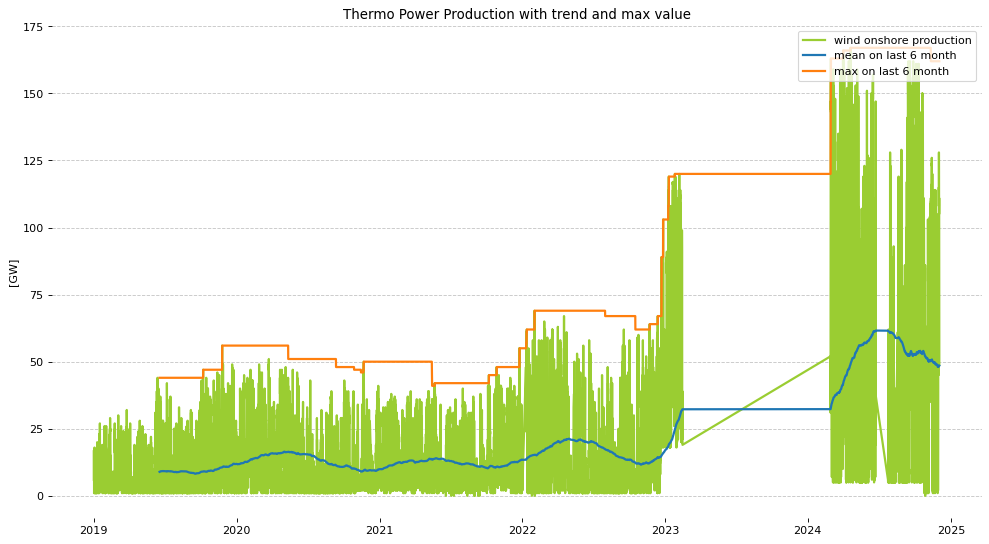

In [41]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(wind_onshore_nord["WIND_ONSHORE_MW"], linewidth=2, label = 'wind onshore production', color = "yellowgreen") 
ax.plot(wind_onshore_nord["WIND_ONSHORE_MW"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(wind_onshore_nord["WIND_ONSHORE_MW"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Thermo Power Production with trend and max value"); ax.set_ylabel("[GW]")
ax.legend(loc='upper right')
plt.show()